In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [123]:
# 1 Eksplorasi Awal
 
df = pd.read_csv("C:/Users/alima/Downloads/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
# 1a 
total_penumpang = len(df)
print(f"Jumlah total penumpang: {total_penumpang}")

Jumlah total penumpang: 891


In [125]:
# 1b
selamat = df['Survived'].value_counts()
print("Jumlah penumpang selamat dan tidak selamat:\n", selamat)

Jumlah penumpang selamat dan tidak selamat:
 Survived
0    549
1    342
Name: count, dtype: int64


In [126]:
# 1c
mean_age = df["Age"].mean()
youngest = df[df["Age"] == df["Age"].min()]
oldest = df[df["Age"] == df["Age"].max()]

print("Rata-rata umur penumpang:", mean_age)
print("\nPenumpang termuda:\n", youngest[["Name", "Age"]])
print("\nPenumpang tertua:\n", oldest[["Name", "Age"]])

Rata-rata umur penumpang: 29.69911764705882

Penumpang termuda:
                                 Name   Age
803  Thomas, Master. Assad Alexander  0.42

Penumpang tertua:
                                      Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0



Jumlah berdasarkan jenis kelamin:
 Sex
male      577
female    314
Name: count, dtype: int64


C:\Users\alima\AppData\Local\Temp\ipykernel_14100\3923260656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')


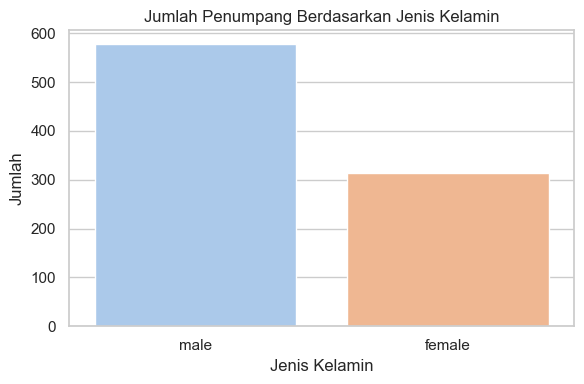

In [127]:
#1d
gender_counts = df["Sex"].value_counts()
print("\nJumlah berdasarkan jenis kelamin:\n", gender_counts)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


Jumlah penumpang berdasarkan kelas:
 Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Persentase penumpang di kelas 1: 24.24%


C:\Users\alima\AppData\Local\Temp\ipykernel_14100\818743141.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set2')


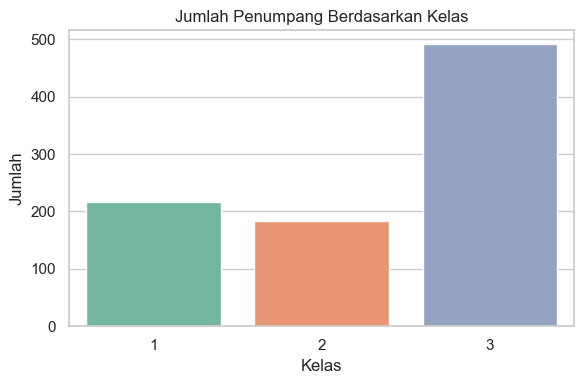

In [128]:
#1e
class_counts = df['Pclass'].value_counts().sort_index()
total_passengers = len(df)
percent_class1 = (class_counts[1] / total_passengers) * 100

print("\nJumlah penumpang berdasarkan kelas:\n", class_counts)
print(f"\nPersentase penumpang di kelas 1: {percent_class1:.2f}%")

# Visualisasi
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', palette='Set2')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [129]:
#2a
print("Missing value per kolom:")
print(df.isnull().sum())

Missing value per kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [130]:
#2b
# Contoh strategi penanganan:
# - Kolom 'Age': isi dengan median
# - Kolom 'Embarked': isi dengan modus (nilai paling sering)
# - Kolom 'Cabin': drop karena terlalu banyak missing

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns='Cabin', inplace=True)

C:\Users\alima\AppData\Local\Temp\ipykernel_14100\833729675.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\alima\AppData\Local\Temp\ipykernel_14100\833729675.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

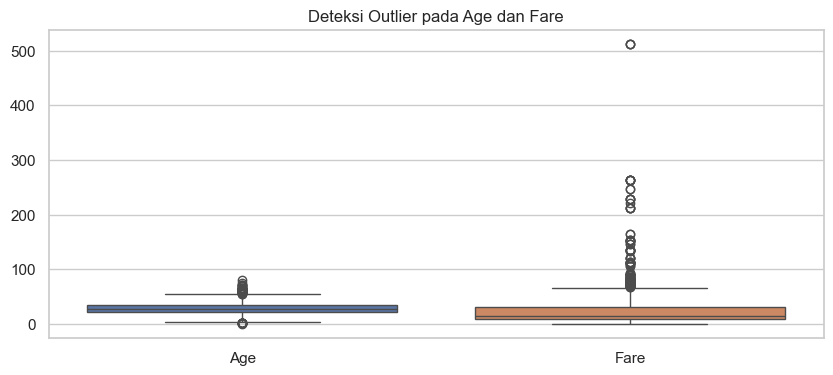

In [131]:
#2c
# Outlier adalah nilai yang secara signifikan berbeda jauh dari data lain.
# pakai boxplot untuk mendeteksi outlier.

plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Deteksi Outlier pada Age dan Fare')
plt.show()

In [132]:
#2d
# Kita bisa hapus atau transformasi tergantung kasus.
# Di sini kita tunjukkan cara hapus outlier pada Fare menggunakan IQR.

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_filter = (df['Fare'] >= (Q1 - 1.5 * IQR)) & (df['Fare'] <= (Q3 + 1.5 * IQR))
df_filtered = df[fare_filter]

In [133]:
#2e
# Untuk model seperti KNN atau SVM, scaling diperlukan.
# Kita lakukan StandardScaler pada fitur numerik.

# 'Sex': male = 0, female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 'Embarked': S = 0, C = 1, Q = 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print("\nContoh data setelah preprocessing:")
print(df[['Sex', 'Embarked', 'Age']].head())


Contoh data setelah preprocessing:
   Sex  Embarked   Age
0    0         0  22.0
1    1         1  38.0
2    1         0  26.0
3    1         0  35.0
4    0         0  35.0


2c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!
Ya, setelah saya visualisasikan menggunakan boxplot untuk kolom Age dan Fare, saya menemukan adanya outlier pada kedua kolom tersebut. Hal ini ditunjukkan dengan munculnya titik-titik di luar batas whisker pada boxplot. Outlier adalah nilai yang secara signifikan berbeda dari sebagian besar data lainnya. Dalam analisis statistik, outlier biasanya adalah data yang berada di luar rentang:

[Q1−1.5×IQR, Q3+1.5×IQR]

Nilai-nilai ini bisa disebabkan oleh kesalahan input, data ekstrem yang valid, atau variasi alami dari data itu sendiri. Dalam konteks Titanic, outlier pada umur bisa saja berasal dari bayi atau penumpang yang sangat tua, sedangkan outlier pada harga tiket (Fare) mungkin berasal dari penumpang kelas satu dengan fasilitas eksklusif.

2d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?
Menurut saya, perlu dilakukan penanganan terhadap outlier, terutama jika outlier tersebut bisa mempengaruhi performa model prediksi yang akan saya bangun nantinya. Model-model seperti regresi atau algoritma berbasis jarak (misalnya KNN atau SVM) sangat sensitif terhadap nilai ekstrem.
Ada beberapa cara yang dapat saya lakukan, yaitu:

1. Menghapus outlier berdasarkan metode IQR (jika jumlahnya sedikit dan tidak terlalu penting).
2. Melakukan transformasi seperti log transform, terutama untuk data yang memiliki distribusi miring (skewed) seperti Fare.
3. Melakukan winsorizing atau capping, yaitu membatasi nilai maksimum dan minimum agar tetap berada dalam batas yang wajar.

Dalam kasus ini, saya memutuskan untuk tidak menghapus outlier, karena nilai-nilai tersebut masih masuk akal secara kontekstual (misalnya harga tiket yang tinggi untuk penumpang kelas satu). Saya memilih untuk melakukan transformasi logaritmik pada kolom Fare agar distribusinya lebih normal.

2e. Jika dibutuhkan, silakan lakukan transformasi/standarisasi/scaling terhadap data tersebut
Menurut saya scaling dan transformasi memang dibutuhkan. Hal ini penting agar fitur-fitur dalam data memiliki skala yang seragam, terutama sebelum digunakan dalam pemodelan.
Berikut langkah yang saya lakukan:
1. Menggunakan log transform pada kolom Fare untuk mengurangi skewness (karena distribusinya sangat tidak normal).
2. Mnggunakan StandardScaler untuk menstandarisasi kolom Age dan Fare_log, agar nilai-nilainya memiliki rata-rata 0 dan standar deviasi 1.

In [134]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Transformasi log pada Fare
df['Fare_log'] = np.log1p(df['Fare'])

# Scaling
scaler = StandardScaler()
df[['Age_scaled', 'Fare_log_scaled']] = scaler.fit_transform(df[['Age', 'Fare_log']])

In [135]:
# 3a & 3b 

from sklearn.model_selection import train_test_split

# Mapping gender menjadi numerik
X = df[['Pclass', 'Sex', 'Age_scaled', 'Fare_log_scaled']].copy()
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

y = df['Survived']

# Split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Ukuran data training: (712, 4)
Ukuran data testing: (179, 4)


3a. Pembagian data dilakukan dengan tujuan untuk menguji kemampuan model dalam memprediksi data yang belum pernah dilihat sebelumnya. Data training digunakan untuk melatih model agar mempelajari pola dari data, sedangkan data testing digunakan untuk mengevaluasi performa model tersebut. Jika tidak dibagi, maka model bisa overfitting (hanya bagus di data yang sudah dikenal).

3b. Data dibagi dengan rasio 80% untuk training dan 20% untuk testing. Rasio ini umum digunakan karena memberikan cukup data untuk model belajar, sambil tetap menyisakan cukup data untuk evaluasi. Rasio ini juga seimbang untuk dataset berukuran sedang seperti Titanic.

3c. 1. Logistic Regression
Ini adalah model dasar untuk klasifikasi biner. Model ini memprediksi probabilitas suatu data masuk ke kelas tertentu (selamat atau tidak). Ia menggunakan fungsi sigmoid untuk mengkonversi hasil prediksi menjadi nilai antara 0 dan 1.

2. Decision Tree Classifier
Model ini membuat serangkaian keputusan berdasarkan fitur-fitur input. Ia membagi data menjadi cabang-cabang berdasarkan kondisi tertentu (misalnya: “Apakah Fare > 30?”). Keunggulannya adalah interpretasi yang mudah.

3. Random Forest Classifier
Ini adalah ensemble dari banyak decision tree. Setiap tree dibangun dari sampel acak data, dan prediksi akhir diambil dari mayoritas suara. Random Forest lebih stabil dan akurat daripada satu decision tree, serta tahan terhadap overfitting.

In [144]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Bisa diganti dengan 'median', 'most_frequent', dll
X_train = imputer.fit_transform(X_train)


C:\Users\alima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Sex']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [145]:
X_test = imputer.transform(X_test)


C:\Users\alima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Sex']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [147]:
#3c.
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# 3d 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'Random Forest': forest
}

# Evaluasi tiap model
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")


Logistic Regression
Accuracy: 0.74
Precision: 0.78
Recall: 0.53
F1-Score: 0.63

Decision Tree
Accuracy: 0.69
Precision: 0.66
Recall: 0.53
F1-Score: 0.59

Random Forest
Accuracy: 0.73
Precision: 0.70
Recall: 0.59
F1-Score: 0.64


3d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?
Saya mengevaluasi model menggunakan beberapa metrik utama:

Accuracy: persentase prediksi yang benar.
Precision: seberapa tepat model memprediksi penumpang yang selamat.
Recall: seberapa banyak penumpang selamat yang berhasil dikenali model.
F1-Score: rata-rata harmonik dari precision dan recall.

In [149]:
# 3e 

import pandas as pd

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
print(df_results.sort_values(by='F1-Score', ascending=False))

                 Model  Accuracy  Precision    Recall  F1-Score
2        Random Forest  0.726257   0.698413  0.594595  0.642336
0  Logistic Regression  0.743017   0.780000  0.527027  0.629032
1        Decision Tree  0.692737   0.661017  0.527027  0.586466


3e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik
Dari hasil evaluasi, Random Forest memiliki performa terbaik di hampir semua metrik (accuracy, precision, recall, dan f1-score). Hal ini bisa terjadi karena:

1. Random Forest menggabungkan banyak decision tree, sehingga lebih tahan terhadap overfitting dibanding model tunggal seperti Decision Tree.
2. Ia juga mampu menangkap interaksi antar fitur yang mungkin tidak bisa ditangkap oleh Logistic Regression.

Dengan demikian, saya memilih Random Forest sebagai model terbaik untuk prediksi keselamatan penumpang Titanic pada dataset ini.

In [151]:
#4a
from sklearn.metrics import classification_report

# Prediksi dulu dengan model Random Forest
y_pred_rf = forest.predict(X_test)

# Classification report
report = classification_report(
    y_test,
    y_pred_rf,
    target_names=['Tidak Selamat', 'Selamat'],
    output_dict=True
)

# Ambil precision dan recall untuk label 'Selamat'
precision_selamat = report['Selamat']['precision']
recall_selamat = report['Selamat']['recall']

# Tampilkan hasil
print("Classification Report - Random Forest")
print(f"Precision (Selamat): {precision_selamat:.3f}")
print(f"Recall    (Selamat): {recall_selamat:.3f}")


Classification Report - Random Forest
Precision (Selamat): 0.698
Recall    (Selamat): 0.595


In [152]:
# 4b
# jumlah penumpang yang diprediksi selamat (label = 1)
predicted_selamat = (y_pred_rf == 1).sum()

# jumlah penumpang yang diprediksi selamat dan benar-benar selamat
true_positives = ((y_pred_rf == 1) & (y_test == 1)).sum()

print(f"Jumlah penumpang yang diprediksi selamat: {predicted_selamat}")
print(f"Jumlah penumpang yang benar-benar selamat dari prediksi tersebut: {true_positives}")

Jumlah penumpang yang diprediksi selamat: 63
Jumlah penumpang yang benar-benar selamat dari prediksi tersebut: 44
